# ML for Hydrology - Model Proposals

In [ ]:
# Install libraries
%pip install scikit-learn
%pip install pandas
%pip install matplotlib
%pip install numpy

In [1]:
# DATA INITIALIZATION
import pandas as pd
from sklearn.model_selection import train_test_split

# Read CSV and ensure data is complete
df = pd.read_csv("./aggregated-merged-data.csv")
if any(df.isnull().sum()):
    print("[WARNING]: Data contains null values")

# Split data into training and testing sets
training_data, test_data = train_test_split(
    df, train_size=0.7, test_size=0.3, random_state=42
)

# Sort data by date
training_data = training_data.sort_values(by="CaptureTime")
test_data = test_data.sort_values(by="CaptureTime")

# Select features
generic_feature_names = [
    "grayMean",
    "graySigma",
    "entropyMean",
    "entropySigma",
    "hMean",
    "hSigma",
    "sMean",
    "sSigma",
    "vMean",
    "vSigma",
]
above_weir_feature_names = [
    "grayMean0",
    "graySigma0",
    "entropyMean0",
    "entropySigma0",
    "hMean0",
    "hSigma0",
    "sMean0",
    "sSigma0",
    "vMean0",
    "vSigma0",
]
below_weir_feature_names = [
    "grayMean1",
    "graySigma1",
    "entropyMean1",
    "entropySigma1",
    "hMean1",
    "hSigma1",
    "sMean1",
    "sSigma1",
    "vMean1",
    "vSigma1",
]
weir_feature_names = [
    "WeirAngle",
    "WeirPt1X",
    "WeirPt1Y",
    "WeirPt2X",
    "WeirPt2Y",
    "WwRawLineMin",
    "WwRawLineMax",
    "WwRawLineMean",
    "WwRawLineSigma",
    "WwCurveLineMin",
    "WwCurveLineMax",
    "WwCurveLineMean",
    "WwCurveLineSigma",
]


water_color_feature_names = ["Green", "Blue", "Brown"]

selected_feature_names = (
    generic_feature_names + above_weir_feature_names +
    below_weir_feature_names + weir_feature_names
    + water_color_feature_names
)

# Split stage data into features and expected values
stage_training_features = training_data[selected_feature_names].values
stage_training_observations = training_data["Stage"].values
stage_test_features = test_data[selected_feature_names].values
stage_test_observations = test_data["Stage"].values

# Split discharge data into features and expected values
discharge_training_features = training_data[selected_feature_names].values
discharge_training_observations = training_data["Discharge"].values
discharge_test_features = test_data[selected_feature_names].values
discharge_test_observations = test_data["Discharge"].values


In [2]:
# ML INITIALIZATION
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
import numpy as np

def run_models(stage_model, discharge_model):
    # Train models
    print("Training models...")
    stage_model.fit(stage_training_features, stage_training_observations)
    discharge_model.fit(discharge_training_features, discharge_training_observations)
    print("Training complete")

    # Test the model
    print("Testing models...")
    stage_predictions = stage_model.predict(X=stage_test_features)
    discharge_predictions = discharge_model.predict(X=discharge_test_features)
    print("Testing complete")

    # Calculate the error, print it, and plot it
    print("[Stage] Mean absolute error: %.3f" % mean_absolute_error(stage_test_observations, stage_predictions))
    print("[Stage] Mean squared error: %.3f" % mean_squared_error(stage_test_observations, stage_predictions))
    plt.plot(test_data["CaptureTime"].values, stage_predictions, label='Predicted', linewidth=1)
    plt.plot(test_data["CaptureTime"].values, stage_test_observations, label='Expected', linewidth=1)
    plt.grid(visible=True)
    plt.title("Stage")
    plt.xlabel("Date")
    plt.ylabel("Stage (ft)")
    # limit nunmber of ticks on x axis to 10
    plt.xticks(np.linspace(0, len(test_data["CaptureTime"].values), 10), rotation=45)
    plt.legend(loc="upper right")
    plt.show()

    print("[Discharge] Mean squared error: %.3f" % mean_squared_error(discharge_test_observations, discharge_predictions))
    print("[Discharge] Mean absolute error: %.3f" % mean_absolute_error(discharge_test_observations, discharge_predictions))
    plt.plot(test_data["CaptureTime"].values, discharge_predictions, label='Predicted', linewidth=1)
    plt.plot(test_data["CaptureTime"].values, discharge_test_observations, label='Expected', linewidth=1)
    plt.grid(visible=True)
    plt.title("Discharge")
    plt.xlabel("Date")
    plt.ylabel("Discharge (cfs)")
    # limit nunmber of ticks on x axis to 10
    plt.xticks(np.linspace(0, len(test_data["CaptureTime"].values), 10), rotation=45)
    plt.legend(loc="upper right")
    plt.show()


In [ ]:
# Proposal 1: Use a Support Vector Machine to predict stage and discharge
from sklearn.svm import SVR
stage_model = SVR()
discharge_model = SVR()
run_models(stage_model, discharge_model)

In [ ]:
# Proposal 2: Use a Random Forest to predict stage and discharge
from sklearn.ensemble import RandomForestRegressor
stage_model = RandomForestRegressor()
discharge_model = RandomForestRegressor()
run_models(stage_model, discharge_model)

In [ ]:
# Proposal 3: Use a Multi-Layer Perceptron to predict stage and discharge
from sklearn.neural_network import MLPRegressor
stage_model = MLPRegressor()
discharge_model = MLPRegressor()
run_models(stage_model, discharge_model)

Training models...
Training complete
Testing models...
Testing complete
[Stage] Mean absolute error: 0.115
[Stage] Mean squared error: 0.059


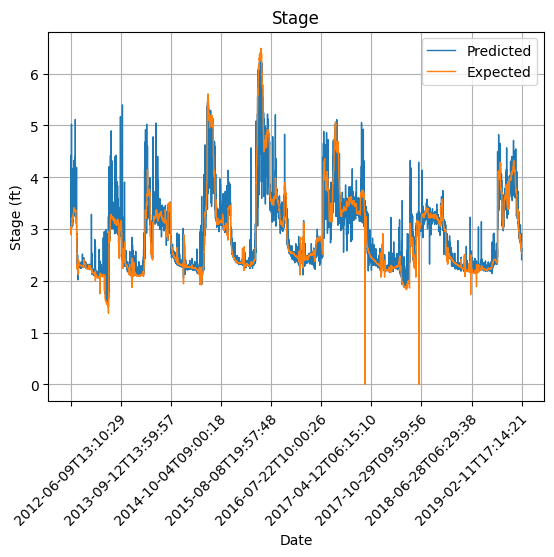

[Discharge] Mean squared error: 160821.824
[Discharge] Mean absolute error: 165.418


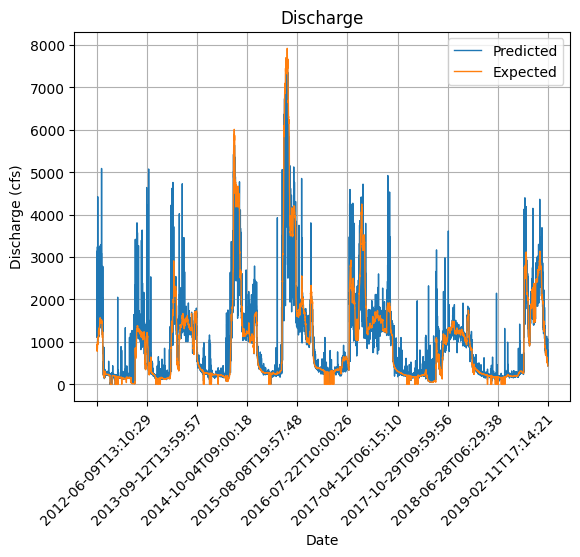

In [3]:
# Proposal 4: Use a Extremely Randomized Trees to predict stage and discharge
from sklearn.ensemble import ExtraTreesRegressor
stage_model = ExtraTreesRegressor()
discharge_model = ExtraTreesRegressor()
run_models(stage_model, discharge_model)

In [ ]:
# Proposal 5: Use a Bayesian Ridge to predict stage and discharge
from sklearn.linear_model import BayesianRidge
stage_model = BayesianRidge()
discharge_model = BayesianRidge()
run_models(stage_model, discharge_model)